# **Análisis exploratorio inicial de los conjuntos de datos MoonProt y MoonDB**


## Montaje de Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carga de datos e importación de librerías

In [ ]:
# Importamos las librerías necesarias.
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

# Cargamos todos los datasets necesarios para el análisis.
moonprot_dataset = pd.read_csv('/content/drive/My Drive/moonprot_dataset.csv')    # Datos de MoonProt.
moondb_dataset = pd.read_csv('/content/drive/My Drive/moondb_dataset.csv')        # Datos de MoonDB.

## Análisis descriptivo básico
Contamos el número total de proteínas, las proteínas con entradas en PDB y la diversidad de organismos en cada conjunto.


In [ ]:
def describir_proteinas(df):
    num_proteinas = len(df)
    num_organismos = df['Organism Name'].nunique()
    num_proteinas_pdb = df['PDB ID'].apply(lambda x: pd.notna(x) and x != '').sum()
    return num_proteinas, num_organismos, num_proteinas_pdb

print("MoonProt Dataset:")
print("Número total de proteínas, Número de organismos diferentes, Número de proteínas con entradas PDB:", describir_proteinas(moonprot_dataset))
print("MoonDB Dataset:")
print("Número total de proteínas, Número de organismos diferentes, Número de proteínas con entradas PDB:", describir_proteinas(moondb_dataset))

MoonProt Dataset:
Número total de proteínas, Número de organismos diferentes, Número de proteínas con entradas PDB: (451, 145, 209)
MoonDB Dataset:
Número total de proteínas, Número de organismos diferentes, Número de proteínas con entradas PDB: (351, 10, 265)


## Comparación entre los datasets MoonProt y MoonDB
Analizamos cuántas proteínas se repiten en ambos conjuntos de datos.


In [ ]:
# Nos aseguramos que todas las columnas tengan el mismo tipo de datos antes de comparar.
for column in moonprot_dataset.columns:
    if moonprot_dataset[column].dtype != moondb_dataset[column].dtype:
        moonprot_dataset[column] = moonprot_dataset[column].astype(str)
        moondb_dataset[column] = moondb_dataset[column].astype(str)

# Identificamos y mostramos las filas duplicadas entre ambos datasets.
duplicated_rows = pd.merge(moonprot_dataset, moondb_dataset)
print("Filas duplicadas entre MoonProt y MoonDB:", duplicated_rows.shape)

# Guardamos las filas duplicadas en un archivo CSV.
duplicated_rows.to_csv('/content/drive/My Drive/moon_duplicadas.csv', index=False)

Filas duplicadas entre MoonProt y MoonDB: (33, 11)


## Calculo del tamaño de las proteínas
Determinamos la cantidad de aminoácidos para las proteínas de cada conjunto y reorganizamos las columnas para mejorar la visualización.

In [ ]:
# Calculamos la columna de tamaño de proteínas.
moonprot_dataset['Protein Size'] = moonprot_dataset['Amino Acid Sequence'].apply(len)
moondb_dataset['Protein Size'] = moondb_dataset['Amino Acid Sequence'].apply(len)

# Reordenamos columnas para mejorar la legibilidad.
ordered_columns = ['UniProt IDs', 'PDB ID', 'Gene Name', 'Protein Name', 'Amino Acid Sequence', 'Protein Size', 'Organism Name', 'Status', 'Protein Existence', 'GO BP Terms', 'GO CC Terms', 'GO MF Terms']
moonprot_dataset = moonprot_dataset[ordered_columns]
moondb_dataset = moondb_dataset[ordered_columns]

# Visualizamos de las primeras filas de los DataFrames.
moonprot_dataset.head()
moondb_dataset.head()

,UniProt IDs,PDB ID,Gene Name,Protein Name,Amino Acid Sequence,Protein Size,Organism Name,Status,Protein Existence,GO BP Terms,GO CC Terms,GO MF Terms
0,Q86VP1,2M7Q; 4BMJ; 4NLH; 4Z4K; 4Z4M; 5AAS; 5YT6; 5Z7G,"{'Name': 'TAX1BP1', 'Synonyms': ['T6BP'], 'ORF...",Tax1-binding protein 1,MTSFQEVPLQTSNFAHVIFQNVAKSYLPNAHLECHYTLTPYIHPHP...,789,Homo sapiens (Human).,Reviewed,1,GO:0006915 - apoptotic process; GO:0006914 - a...,GO:0005776 - autophagosome; GO:0031410 - cytop...,GO:0019900 - kinase binding; GO:0046872 - meta...
1,Q8WUM4,2OEV; 2OEW; 2OEX; 2OJQ; 2R02; 2R03; 2R05; 2XS1...,{'Name': 'PDCD6IP {ECO:0000312|HGNC:HGNC:8766}...,Programmed cell death 6-interacting protein {E...,MATFISVQLKKTSEVDLAKPLVKFIQQTYPSGGEEQAQYCRAAEEL...,868,Homo sapiens (Human).,Reviewed,1,GO:0000915 - actomyosin contractile ring assem...,GO:0042641 - actomyosin; GO:0005923 - bicellul...,GO:0048306 - calcium-dependent protein binding...
2,Q6UWE0,NaN,{'Name': 'LRSAM1 {ECO:0000303|PubMed:20865121}...,E3 ubiquitin-protein ligase LRSAM1 {ECO:0000305},MPLFFRKRKPSEEARKRLEYQMCLAKEAGADDILDISKCELSEIPF...,723,Homo sapiens (Human).,Reviewed,1,GO:0006914 - autophagy; GO:0045806 - negative ...,GO:0005737 - cytoplasm; GO:0005829 - cytosol; ...,GO:0046872 - metal ion binding; GO:0061630 - u...
3,O00499,1MUZ; 1MV0; 1MV3; 2FIC; 2RMY; 2RND; 5I22,"{'Name': 'BIN1', 'Synonyms': ['AMPHL']}",Myc box-dependent-interacting protein 1,MAEMGSKGVTAGKIASNVQKKLTRAQEKVLQKLGKADETKDEQFEQ...,593,Homo sapiens (Human).,Reviewed,1,GO:0007010 - cytoskeleton organization; GO:000...,GO:0015629 - actin cytoskeleton; GO:0030424 - ...,GO:0051015 - actin filament binding; GO:001982...
4,P06744,1IAT; 1IRI; 1JIQ; 1JLH; 1NUH; 6XUH; 6XUI; 8BBH...,"{'Name': 'GPI {ECO:0000303|PubMed:2387591, ECO...",Glucose-6-phosphate isomerase {ECO:0000303|Pub...,MAALTRDPQFQKLQQWYREHRSELNLRRLFDANKDRFNHFSLTLNT...,558,Homo sapiens (Human).,Reviewed,1,GO:0005975 - carbohydrate metabolic process; G...,GO:0060170 - ciliary membrane; GO:0005829 - cy...,GO:0097367 - carbohydrate derivative binding; ...


## Visualización de los datos de los conjuntos de datos MoonProt y MoonDB


### Diagrama de Venn

Nos permite estudiar el solapamiento entre ambos datasets.

In [ ]:
# Instalamos matplotlib-venn para dibujar diagramas de Venn.
!pip install matplotlib-venn

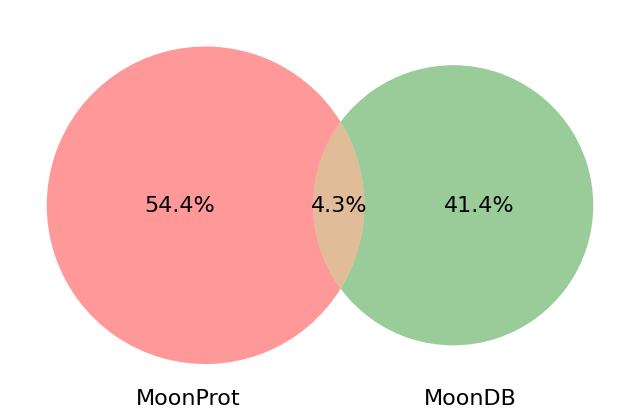

In [ ]:
# Calculamos los tamaños únicos y la intersección.
unique_moonprot = len(moonprot_dataset) - len(duplicated_rows)
unique_moondb = len(moondb_dataset) - len(duplicated_rows)
intersection = len(duplicated_rows)

# Calculamos el total para convertir a porcentajes.
total = unique_moonprot + unique_moondb + intersection

# Calculamos los porcentajes.
percent_unique_moonprot = (unique_moonprot / total) * 100
percent_unique_moondb = (unique_moondb / total) * 100
percent_intersection = (intersection / total) * 100

# Dibujamos el diagrama de Venn con los porcentajes.
plt.figure(figsize=(8, 8))
venn_diagram = venn2(subsets=(percent_unique_moonprot, percent_unique_moondb, percent_intersection), set_labels=('MoonProt', 'MoonDB'))

# Aumentamos el tamaño de las etiquetas.
for text in venn_diagram.set_labels:
    text.set_fontsize(16)

# Alineamos las etiquetas al mismo nivel.
venn_diagram.set_labels[0].set_position((-0.2, -0.5))
venn_diagram.set_labels[1].set_position((0.3, -0.5))

# Modificamos los números para mostrar porcentajes con 1 decimal.
for idx, text in enumerate(venn_diagram.subset_labels):
    if text:
        if idx == 0:
            text.set_text(f"{percent_unique_moonprot:.1f}%")
        elif idx == 1:
            text.set_text(f"{percent_unique_moondb:.1f}%")
        elif idx == 2:
            text.set_text(f"{percent_intersection:.1f}%")
        text.set_fontsize(16)

#plt.title("Solapamiento de Datos de MoonProt y MoonDB", fontsize=20)
plt.show()

Nota: El diagrama de Venn muestra una pequeña cantidad de proteínas compartidas entre los datasets de MoonProt y MoonDB, destacando la complementariedad de estas bases de datos. El escaso solapamiento observado podría deberse a diferencias metodológicas en la recopilación de los datos.


### Distribución de proteínas por organismo

Representamos gráficamente la cantidad de proteínas por organismo para ambos conjuntos.

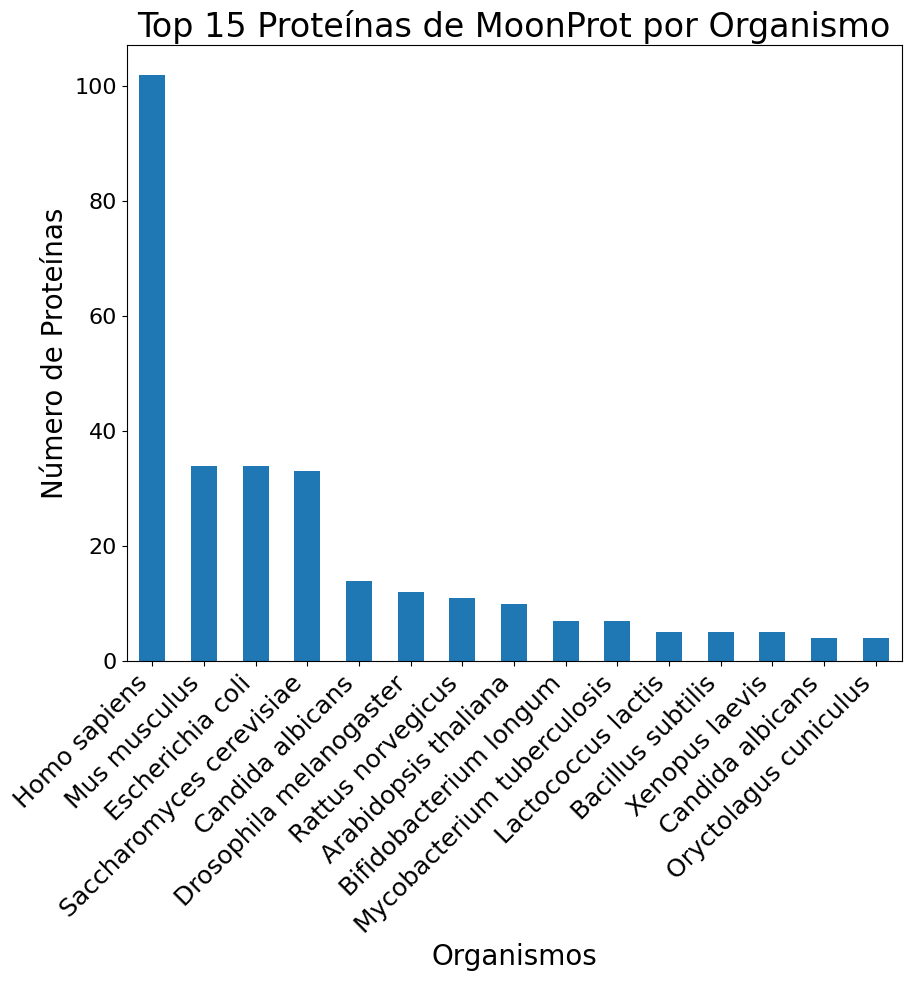

In [ ]:
# Visualizamos la distribución de proteínas por organismo en MoonProt.
organism_counts = moonprot_dataset['Organism Name'].value_counts().head(15)

# Modificamos los nombres de los organismos para que solo aparezcan las dos primeras palabras.
modified_organisms = [' '.join(name.split()[:2]) for name in organism_counts.index]

plt.figure(figsize=(10, 8))
organism_counts.index = modified_organisms
organism_counts.plot(kind='bar')

plt.title('Top 15 Proteínas de MoonProt por Organismo', fontsize=24)
plt.xlabel('Organismos', fontsize=20)
plt.ylabel('Número de Proteínas', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize=16)
plt.show()

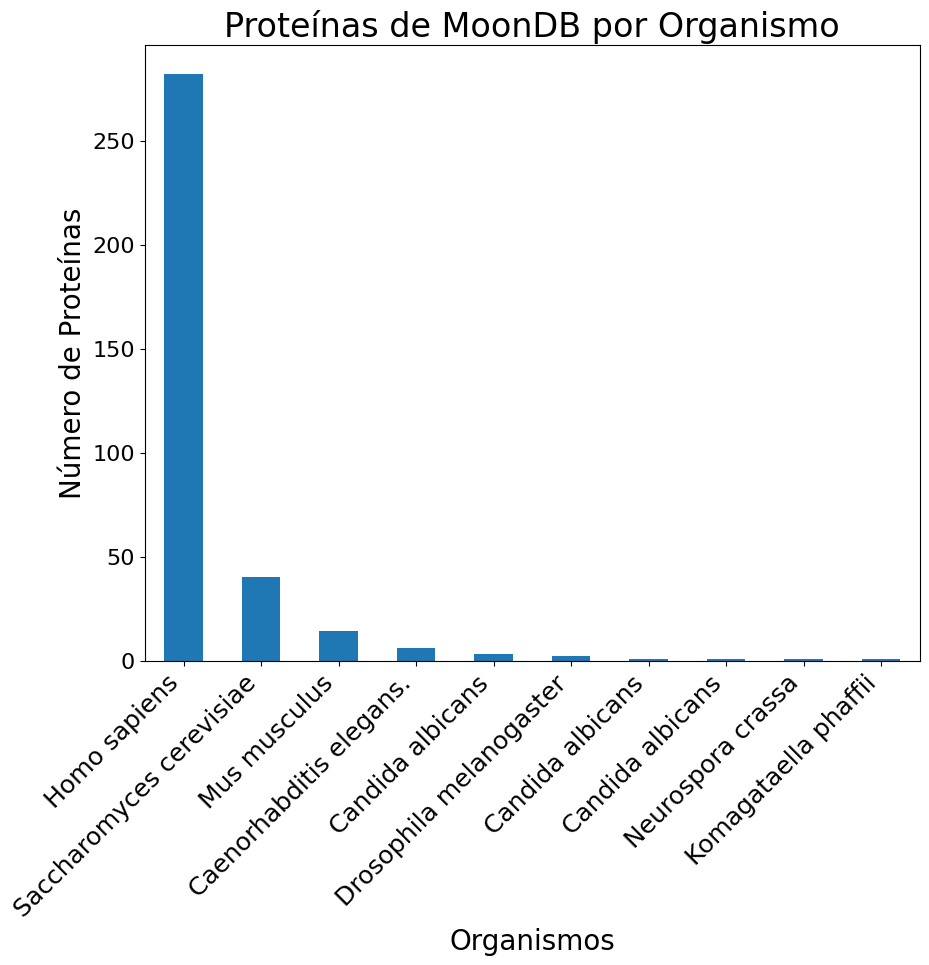

In [ ]:
# Visualizamos la distribución de proteínas por organismo en MoonDB.
organism_counts = moondb_dataset['Organism Name'].value_counts()

# Modificar los nombres de los organismos para que solo aparezcan las dos primeras palabras
modified_organisms = [' '.join(name.split()[:2]) for name in organism_counts.index]

plt.figure(figsize=(10, 8))
organism_counts.index = modified_organisms
organism_counts.plot(kind='bar')

plt.title('Proteínas de MoonDB por Organismo', fontsize=24)
plt.xlabel('Organismos', fontsize=20)
plt.ylabel('Número de Proteínas', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize=16)
plt.show()

### Distribución del tamaño de las proteínas
Visualizamos el tamaño de las proteínas de ambos conjuntos usando histogramas.

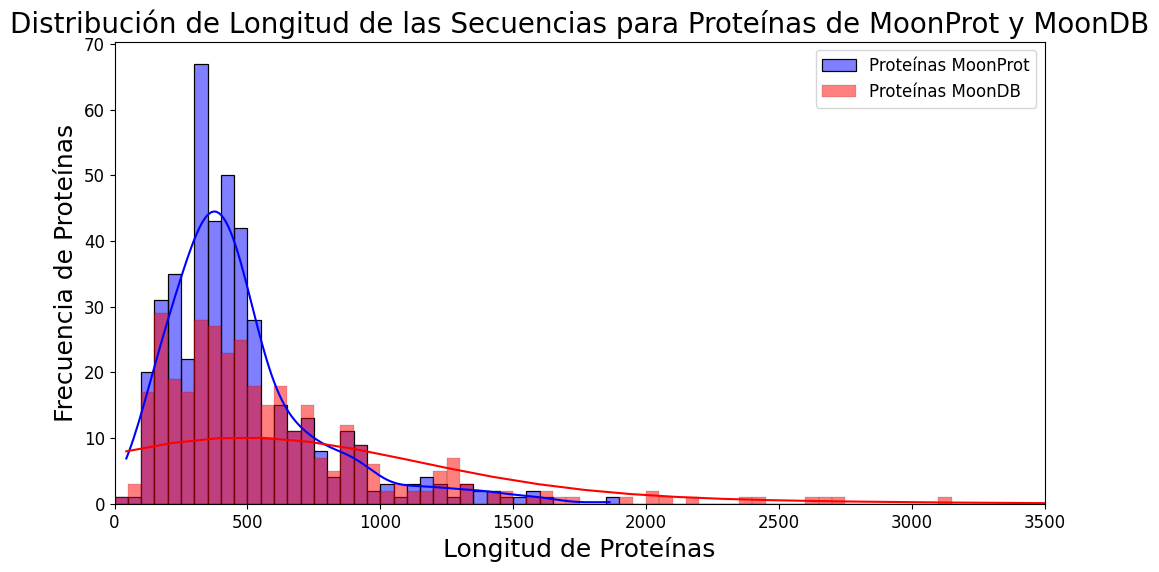

In [ ]:
# Configuración de los histogramas para comparar tamaños de proteínas.
bins = range(0, 3500, 50)
plt.figure(figsize=(12, 6))
sns.histplot(moonprot_dataset['Protein Size'], bins=bins, color='blue', label='Proteínas MoonProt', kde=True, alpha=0.5)
sns.histplot(moondb_dataset['Protein Size'], bins=bins, color='red', label='Proteínas MoonDB', kde=True, alpha=0.5)

plt.title('Distribución de Longitud de las Secuencias para Proteínas de MoonProt y MoonDB', fontsize=20)
plt.xlabel('Longitud de Proteínas', fontsize=18)
plt.ylabel('Frecuencia de Proteínas', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.xlim(0, 3500)
plt.show()